In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

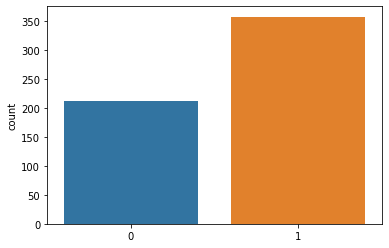

In [ ]:
sns.countplot(x = cancer['target'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = cancer['data']
y = cancer['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth =5)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.score(X_test,y_test)

0.9649122807017544

In [ ]:
y_pred = dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [ ]:
confusion_matrix(y_test,y_pred)

array([[45,  4],
       [ 0, 65]])

# RandomizedSearchCV and GridSearchCV

# RandomSearchCV

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
data  = load_breast_cancer()
df = pd.DataFrame(data.data,columns= data.feature_names)
df['label'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**seperate our feature and target**

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
clf = DecisionTreeClassifier()

**sepecify parameters and distrubution to sample form**

In [ ]:
param_dist = {'max_depth':[3,None],
              'max_features':range(1,11),
              'min_samples_split':range(2,11),
              'criterion':['gini', 'entropy']
              }

**lets pass everything to RandomizedSearchCV()**

In [ ]:
random_search = RandomizedSearchCV(clf,param_dist, n_iter=10,cv=5)

In [ ]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [ ]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features=5, min_samples_split=9)

In [ ]:
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_split': 9}

In [ ]:
random_search.best_score_

0.9507995652848937

# GridSearchCV

In [ ]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}

In [ ]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [ ]:
grid_search.best_score_

0.9455829840086942

In [ ]:
final = grid_search.best_estimator_
final

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                       min_samples_split=3)